# **Informasi Data**

Data yang digunakan untuk study case ini berasal dari https://www.kaggle.com/datasets/timchant/supstore-dataset-2019-2022/data. Dataset terdiri dari catatan penjualan komprehensif dari sebuah superstore, yang berisi 9.994 entri di 19 kolom berbeda. Ini mencakup berbagai kategori seperti detail pesanan, informasi pelanggan anonim, spesifikasi produk, dan metrik keuangan. Keterangan untuk setiap kolomnya adalah sebagai berikut

1.   Order ID : Nomor unik yang mengidentifikasi setiap pesanan atau transaksi yang dilakukan.
2.   Order Date : Tanggal ketika pesanan dilakukan oleh pelanggan.
3. Ship Date : Tanggal ketika pesanan dikirim kepada pelanggan.
4. Customer: Nama atau ID unik yang mewakili pelanggan yang melakukan pesanan.
5. Segment: Segmentasi pelanggan berdasarkan kategori tertentu
6. Manufactory: Nama atau ID dari produsen atau pabrikan barang yang dipesan.
7. Product Name: Nama produk yang dipesan.
8. Category: Kategori umum dari produk yang dipesan.
9. Subcategory: Subkategori yang lebih spesifik di bawah kategori umum.
10. Region: Wilayah geografis tempat pelanggan atau toko berada.
11. City: Kota tempat pelanggan atau toko yang menerima pengiriman berada.
12. State: Negara bagian tempat pesanan dikirim atau pelanggan berada.
13. Country: Negara tempat pesanan dikirim.
14. ZIP: Kode pos untuk pelanggan atau lokasi pengiriman.
15. Sales: Total nilai penjualan untuk pesanan tersebut.
16. Quantity: Jumlah unit produk yang dipesan dalam pesanan tersebut.
17. Discount: Persentase atau jumlah diskon yang diterapkan pada pesanan.
18. Profit: Keuntungan yang dihasilkan dari penjualan pesanan tersebut.
19. Profit Margin: Persentase keuntungan bersih yang dihasilkan dari penjualan, dihitung dari rasio antara keuntungan (profit) dan penjualan (sales).



# **Preprocessing**

In [ ]:
try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_)
    print("Installing required Module, please wait ... ")
    !pip install mlxtend
    !pip install pycaret
except:
    print("Running the code locally, make sure to run `pip install mlxtend, pycaret` in terminal")

Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.10/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 99.9 MB/

In [ ]:
# Mengimpor semua library yang dibutuhkan dalam eksplorasi data serta aturan asosiasi
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh'); sns.set()

## Import Data


In [ ]:
# Membaca dataset
data = pd.read_csv('/content/superstore_dataset.csv')
data

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,US-2023-126221,12/30/2022,1/5/2023,Chuck Clark,Eureka,Eureka The Boss Plus 12-Amp Hard Box Upright V...,Home Office,Office Supplies,Appliances,Central,47201,Columbus,Indiana,United States,0.0,56.5110,2,209.300,0.2700
9990,US-2023-143259,12/30/2022,1/3/2023,Patrick O'Donnell,Other,"Bush Westfield Collection Bookcases, Fully Ass...",Consumer,Furniture,Bookcases,East,10009,New York City,New York,United States,0.2,12.1176,4,323.136,0.0375
9991,US-2023-143259,12/30/2022,1/3/2023,Patrick O'Donnell,Wilson Jones,Wilson Jones Legal Size Ring Binders,Consumer,Office Supplies,Binders,East,10009,New York City,New York,United States,0.2,19.7910,3,52.776,0.3750
9992,US-2023-143259,12/30/2022,1/3/2023,Patrick O'Donnell,Other,Gear Head AU3700S Headset,Consumer,Technology,Phones,East,10009,New York City,New York,United States,0.0,2.7279,7,90.930,0.0300


Terlihat bahwa data berukuran 9994 baris × 19 kolom

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_date      9994 non-null   object 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   int64  
 17  sales          9994 non-null   float64
 18  profit_m

Data berisi 19 kolom dengan entry no-null dan terdiri atas 3 jenis kategori : objek, float dan integeer

In [ ]:
# Menampilkan informasi umum dan statistik tentang dataset untuk mengecek ketidakkonsistenan data atau masalah lainnya
data.describe()

,zip,discount,profit,quantity,sales,profit_margin
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.371723,0.156203,28.656896,3.789574,229.858001,0.120314
std,32063.705315,0.206452,234.260108,2.225110,623.245101,0.466754
min,1040.000000,0.000000,-6599.978000,1.000000,0.444000,-2.750000
25%,23223.000000,0.000000,1.728750,2.000000,17.280000,0.075000
50%,56430.500000,0.200000,8.666500,3.000000,54.490000,0.270000
75%,90008.000000,0.200000,29.364000,5.000000,209.940000,0.362500
max,99301.000000,0.800000,8399.976000,14.000000,22638.480000,0.500000


*   Kode pos dalam kolom `zip` idealnya harus dikelompokkan sebagai data kategoris untuk identifikasi geografis dan bukan sebagai angka biasa. Ini memungkinkan segmentasi pasar yang lebih tepat dan analisis data yang lebih mendalam.
*   Kolom seperti `customer`, `manufacturer`, `product_name`, dan `city` menampilkan beragam nilai unik, mengindikasikan kekayaan data yang cocok untuk analisis yang komprehensif.
*   Kolom `order_date` dan `ship_date` yang telah diformat sebagai datetime mencakup periode dari 1 Januari 2019 hingga 30 Desember 2022. Hal ini memfasilitasi analisis tren yang berkembang selama empat tahun, memungkinkan penilaian atas pola musiman atau tahunan.
*   Terdapat beberapa nilai margin keuntungan yang sangat rendah hingga negatif, hingga -2.75, menandakan potensi kerugian dalam beberapa transaksi.
*   Kategori dan subkategori data tampak konsisten, terdiri dari tiga kategori utama dan 17 subkategori, memudahkan pemetaan dan klasifikasi data.
*   Kolom diskon dan keuntungan menunjukkan variasi yang sangat lebar, dengan diskon maksimal hingga 80% dan keuntungan yang bisa mencapai hingga $8,399.976, menunjukkan adanya kemungkinan kesalahan pencatatan atau kebijakan diskon yang agresif

In [ ]:
# Mengubah data 'zip' menjadi data kategorik
data['zip'] = data['zip'].astype('category')

# Mengecek missing value untuk dataset
missing_data = data.isnull().sum()

# Mengecek entry yang terduplikasi
duplicate_data = data.duplicated().sum()

# mengecek semua ketidakkonsistenan seperti penjualan atau profit yang negatif
negative_sales = data[data['sales'] <= 0]
negative_profit = data[data['profit'] <= 0]

{
    "Missing Values": missing_data,
    "Duplicate Entries": duplicate_data,
    "Negative Sales": negative_sales.shape[0],
    "Negative Profit": negative_profit.shape[0]
}


{'Missing Values': order_id         0
 order_date       0
 ship_date        0
 customer         0
 manufactory      0
 product_name     0
 segment          0
 category         0
 subcategory      0
 region           0
 zip              0
 city             0
 state            0
 country          0
 discount         0
 profit           0
 quantity         0
 sales            0
 profit_margin    0
 dtype: int64,
 'Duplicate Entries': 1,
 'Negative Sales': 0,
 'Negative Profit': 1936}

Semua entry pada dataset tidak memiliki missing value. Terdapat 1 duplicate entries pada dataset. Sedangkan penjualan yang minus berjumlah 0 dan profit penjualan yang minus berjumlah 1936

In [ ]:
# cek duplikat
duplicate_rows = data[data.duplicated(keep=False)]
duplicate_rows


,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
385,US-2020-150119,4/23/2019,4/27/2019,Laurel Beltran,Global,Global Leather Highback Executive Chair with P...,Home Office,Furniture,Chairs,East,43229,Columbus,Ohio,United States,0.3,-12.0588,2,281.372,-0.042857
386,US-2020-150119,4/23/2019,4/27/2019,Laurel Beltran,Global,Global Leather Highback Executive Chair with P...,Home Office,Furniture,Chairs,East,43229,Columbus,Ohio,United States,0.3,-12.0588,2,281.372,-0.042857


In [ ]:
# Menghilangkan data yang terduplikasi
data = data.drop_duplicates()

# Memverifikasi data terduplikasi dengan pengecekan ulang
duplicate_check = data.duplicated().sum()
duplicate_check

0

In [ ]:
# Mengecek data dengan type 'order date' untuk mengonfirmasi waktu dan tanggal atau butuh convert
order_date_dtype = data['order_date'].dtype

# Jika 'order date' bukan waktu dan tanggal, convert data
if order_date_dtype != 'datetime64[ns]':
    data['order_date'] = pd.to_datetime(data['order_date'])
    added_datetime_info = True
else:
    added_datetime_info = False

# Print output untuk pengecekan convert
order_date_dtype, added_datetime_info


(dtype('O'), True)

In [ ]:
# Menambahkan kolom hari, bulan, dan tahun ke dataframe
data['day'] = data['order_date'].dt.day
data['month'] = data['order_date'].dt.month
data['year'] = data['order_date'].dt.year

# Mendefinisikan fungsi musim berdasarkan bulan
def get_season(month):
    if 3 <= month <= 5:
        return 'spring'
    elif 6 <= month <= 8:
        return 'summer'
    elif 9 <= month <= 11:
        return 'autumn'
    else:
        return 'winter'

# Mengaplikasikan fungsi musim ke kolom pada dataset
data['season'] = data['month'].apply(get_season)

In [ ]:
# Ubah data_format untuk menggunakan 'subkategori' dan bukan 'nama_produk' untuk deskripsi item
formatted_data = data[['customer', 'order_date', 'subcategory', 'day', 'month', 'year', 'season']]
formatted_data.rename(columns={'customer': 'Member_name', 'order_date': 'Date', 'subcategory': 'itemDescription'}, inplace=True)

formatted_data

,Member_name,Date,itemDescription,day,month,year,season
0,Darren Powers,2019-01-03,Paper,3,1,2019,winter
1,Phillina Ober,2019-01-04,Binders,4,1,2019,winter
2,Phillina Ober,2019-01-04,Labels,4,1,2019,winter
3,Phillina Ober,2019-01-04,Storage,4,1,2019,winter
4,Mick Brown,2019-01-05,Art,5,1,2019,winter
...,...,...,...,...,...,...,...
9989,Chuck Clark,2022-12-30,Appliances,30,12,2022,winter
9990,Patrick O'Donnell,2022-12-30,Bookcases,30,12,2022,winter
9991,Patrick O'Donnell,2022-12-30,Binders,30,12,2022,winter
9992,Patrick O'Donnell,2022-12-30,Phones,30,12,2022,winter


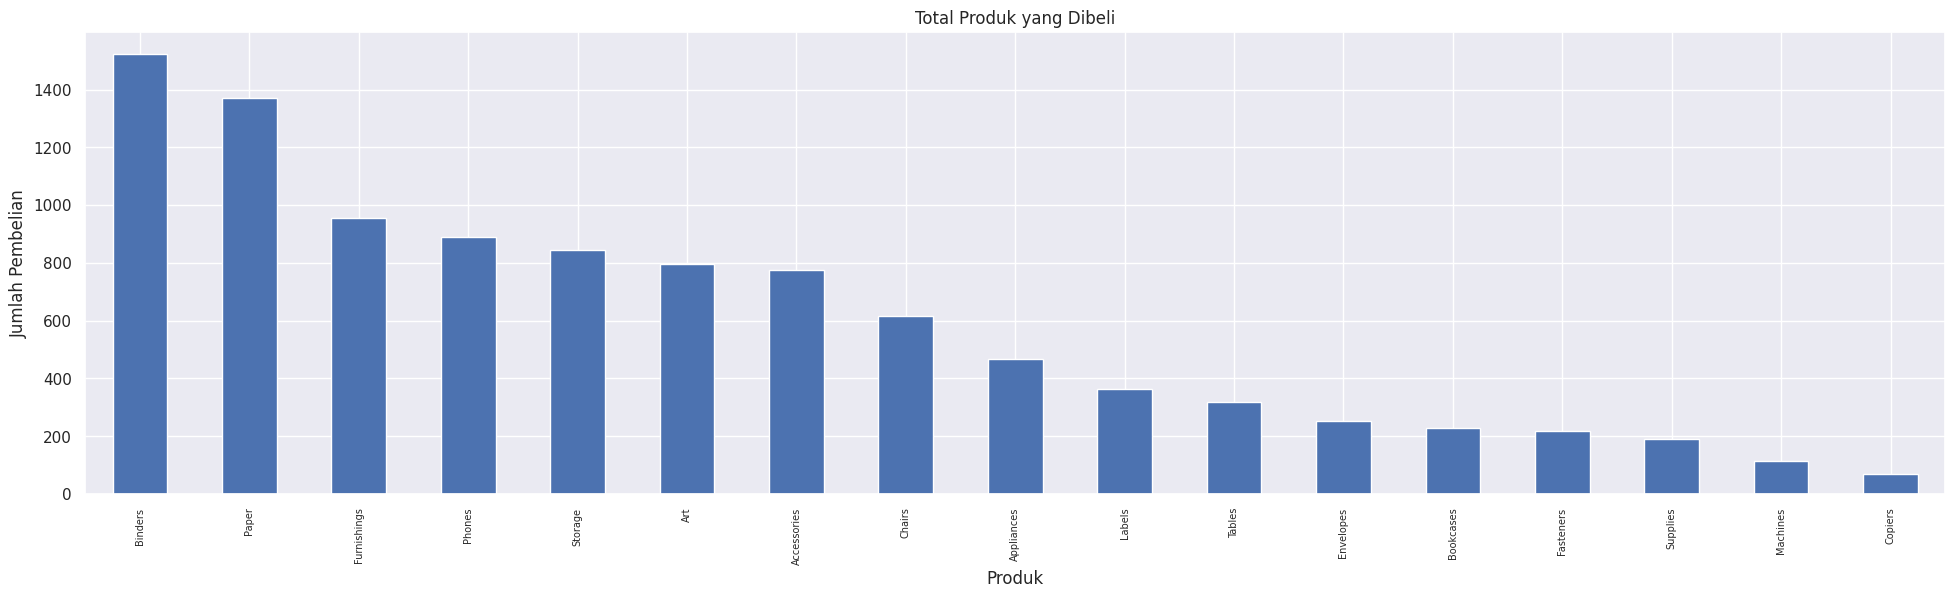

In [ ]:
# Melihat frekuensi produk yang paling sering dibeli
item_counts = formatted_data['itemDescription'].value_counts()

plt.figure(figsize=(24,6))
item_counts.plot(kind='bar')
plt.title('Total Produk yang Dibeli')
plt.xticks(size=7)
plt.xlabel('Produk')
plt.ylabel('Jumlah Pembelian')
plt.show()

Terlihat ada plot yang ditampilkan bahwa produk paling banyak dibeli adalah Binder dengan jumlah >1400 dan produk paling jarang dibeli adalah mesin fotokopi dengan jumlah pembelian <100

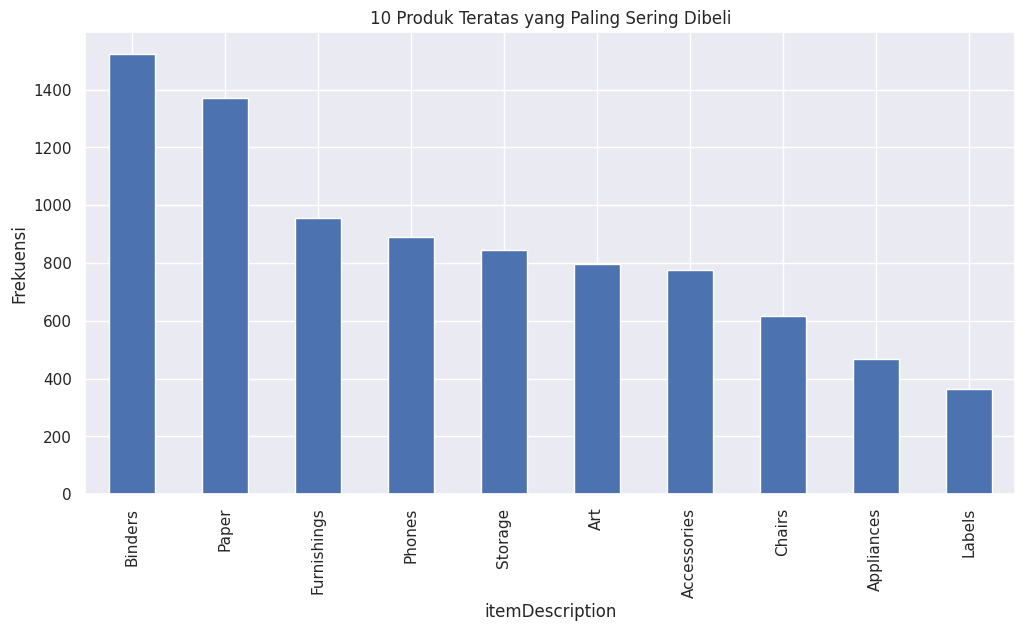

In [ ]:
# Melihat frekuensi 20 produk yang paling sering dibeli
plt.figure(figsize=(12,6))
item_counts.head(10).plot(kind='bar')

plt.title('10 Produk Teratas yang Paling Sering Dibeli')
plt.ylabel('Frekuensi')
plt.show()

Kita mempartisi 17 produk menjadi 10 produk dengan pembelian terbanyak dan dari 10 produk, pembelian paling sedikit ada pada produk label

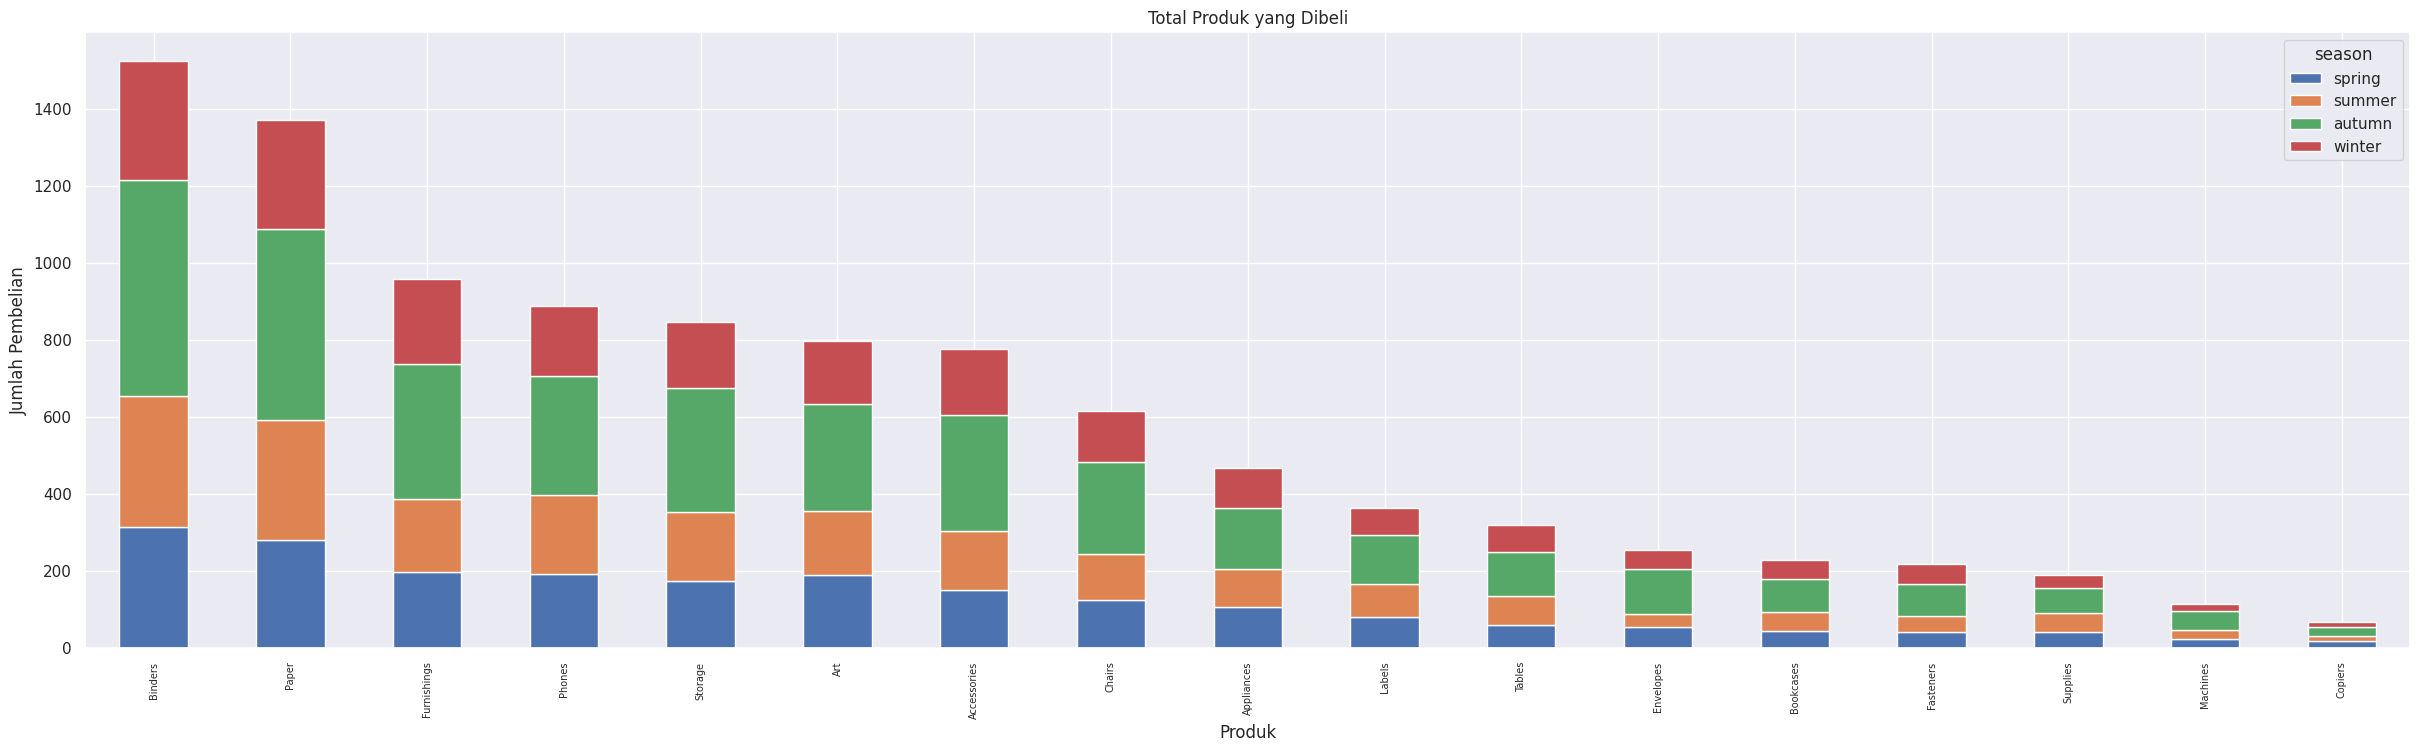

In [ ]:
# Melihat frekuensi produk yang paling sering dibeli
sells_per_season = formatted_data.groupby(['season', 'itemDescription']).size().reset_index().pivot(columns='season', index='itemDescription', values=0)

# Menentukan urutan musim yang diinginkan
season_order = ['spring', 'summer', 'autumn', 'winter']

# Menyusun ulang kolom dari dataframe
sells_per_season = sells_per_season.reindex(columns=season_order)

# Menyussun index dari jumlah tiap kolomnya
sells_per_season['total'] = sells_per_season.sum(axis=1)
sells_per_season = sells_per_season.sort_values(by='total', ascending=False)
sells_per_season = sells_per_season.drop(columns=['total']) # drop the total column, it's for sorting

# Membuat plot dengan ukuran yang diinginkan
fig = plt.figure(figsize=(30, 8))  # Mengatur ulang ukuran untuk mencegah overlap

# Membuat objek pada sumbu x
ax = fig.add_subplot(111) # 111 menciptakan satu sumbu x

# Plot data pada sumbu x
sells_per_season.plot(kind='bar', stacked=True, ax=ax) # Mengganti ukuran ke (10,6)

# Mengatur detail plot
plt.title('Total Produk yang Dibeli')
plt.xticks(size=7)
plt.xlabel('Produk')
plt.ylabel('Jumlah Pembelian')
plt.show()

Berikut adalah plot pembelian produk yang dibagi menjadi 4 musing sesuai urutan, yaitu 'musim semi', 'musim panas', 'musim gugur', dan 'musim dingin'

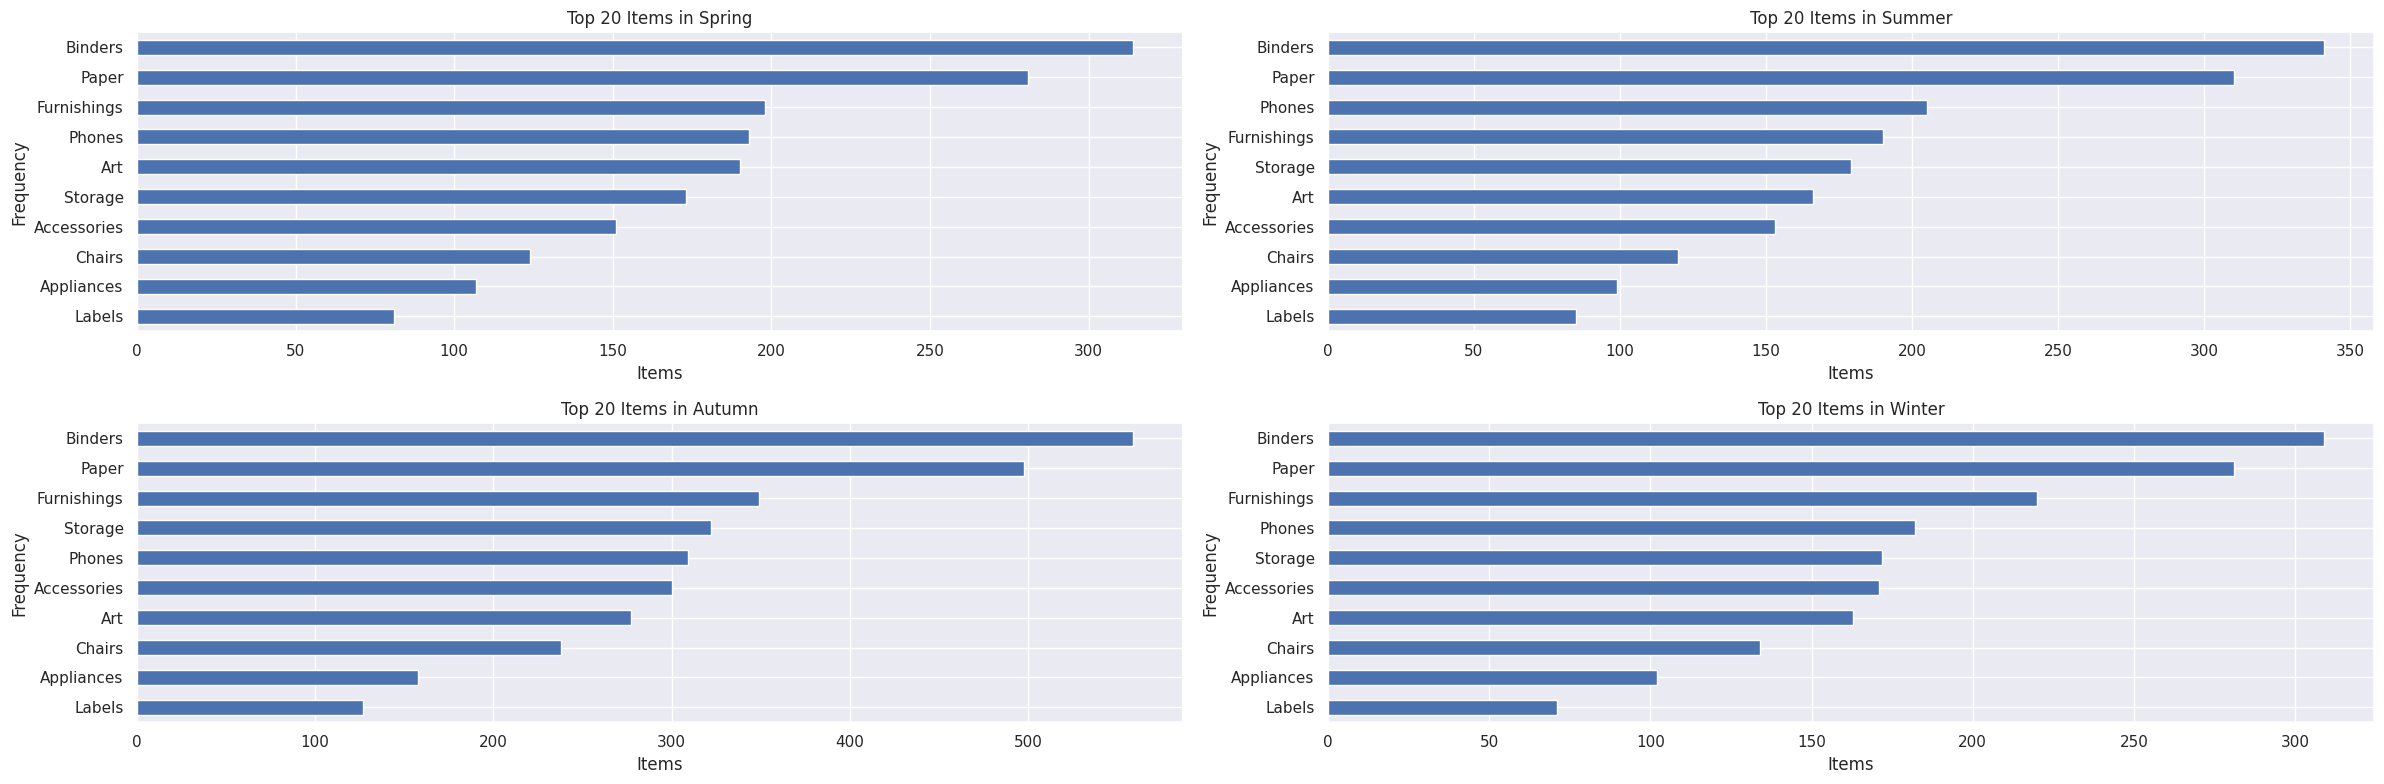

In [ ]:
# Mengelompokan data sesuai musim dan mengurutkan 10 pembelian terbanyak tiap musimnya
top_items_per_season = formatted_data.groupby('season')['itemDescription'].value_counts().groupby('season').head(10)

# Membuat plot untuk 10 pembelian terbanyak tiap musim
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 8))
seasons = ['spring', 'summer', 'autumn', 'winter']
for i, season in enumerate(seasons):
    row = i // 2
    col = i % 2
    top_items = top_items_per_season[season]
    top_items = top_items.sort_values()
    top_items.plot(kind='barh', ax=axes[row, col])
    axes[row, col].set_title(f'Top 20 Items in {season.capitalize()}')
    axes[row, col].set_xlabel('Items')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].tick_params(axis='x')  # Menyesuaikan ukuran label dan rotasi sesuai yang dibutuhkan

plt.tight_layout()
plt.show()

Berikut adalah pola temporal untuk tiap musimnya

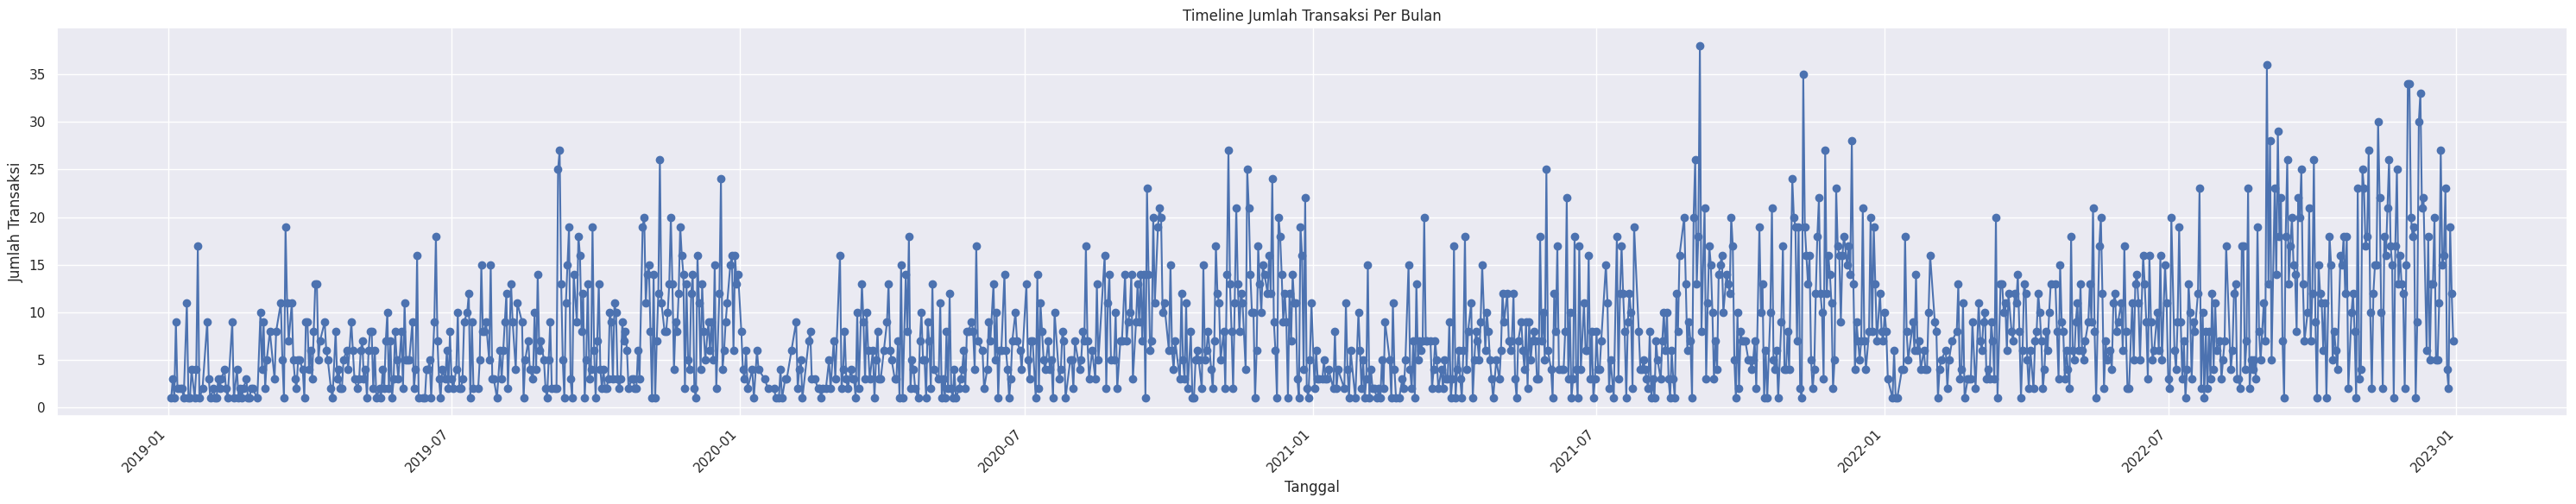

In [ ]:
# Menghitung jumlah transaksi per bulan
transactions_per_day = formatted_data.groupby(data['order_date']).size()

# Membuat diagram timeline jumlah transaksi
plt.figure(figsize=(30,6))
transactions_per_day.plot(kind='line', marker='o', color='b')
plt.title('Timeline Jumlah Transaksi Per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()

Berikut adalah plot berjenis seasonal time series yang menampilkan timeline jumlah transaksi per bulan berdasarkan data tanggal yang diurutkan dari tahun 2019 hingga awal 2023. Terlihat pada plot bahwa jumlah transaksi cenderung meningkat dari waktu ke waktu, terutama setelah tahun 2021

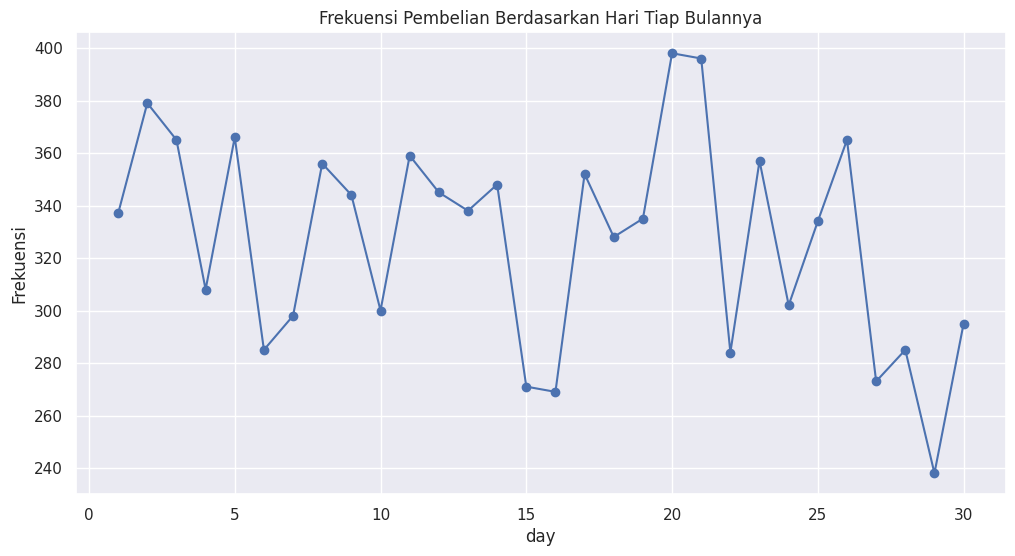

In [ ]:
plt.figure(figsize=(12,6))
data[data['day'].isin(range(0,31))].day.value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Frekuensi Pembelian Berdasarkan Hari Tiap Bulannya')
plt.ylabel('Frekuensi')
plt.show()

Jika plot transaksi dipartisi menjadi plot pembelian berdasarkan hari tiap bulannya, maka berikut adalah plot yang dihasilkan. Terlihat bahwa kenaikan pembelian terbesar terjadi pada hari ke 16-17 dan penurunan pembelian terbesar terjadi pada hari ke 21-22 tiap bulannya

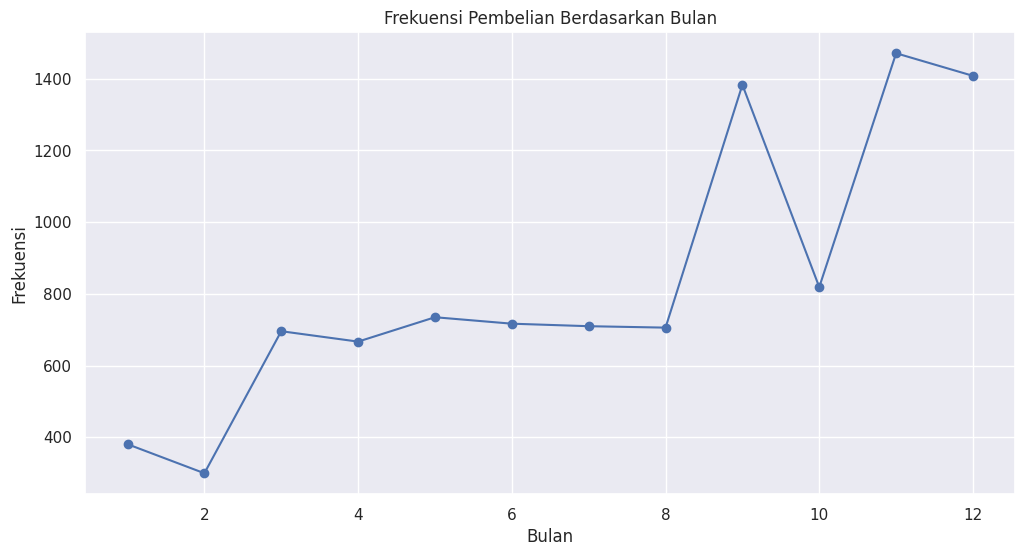

In [ ]:
plt.figure(figsize=(12,6))
data['order_date'].dt.month.value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Frekuensi Pembelian Berdasarkan Bulan')
plt.ylabel('Frekuensi')
plt.xlabel('Bulan')
plt.show()

Jika plot dipartisi berdasarkan frekuensi pembelian tiap bulannya, maka berikut adalah plot yang dihasilkan. Terlihat bahwa kenaikan frekuensi pembelian terbesar terjadi di bulan Agustus-September dan penurunan frekuensi pembelian terbesar terjadi di bulan September-Oktober

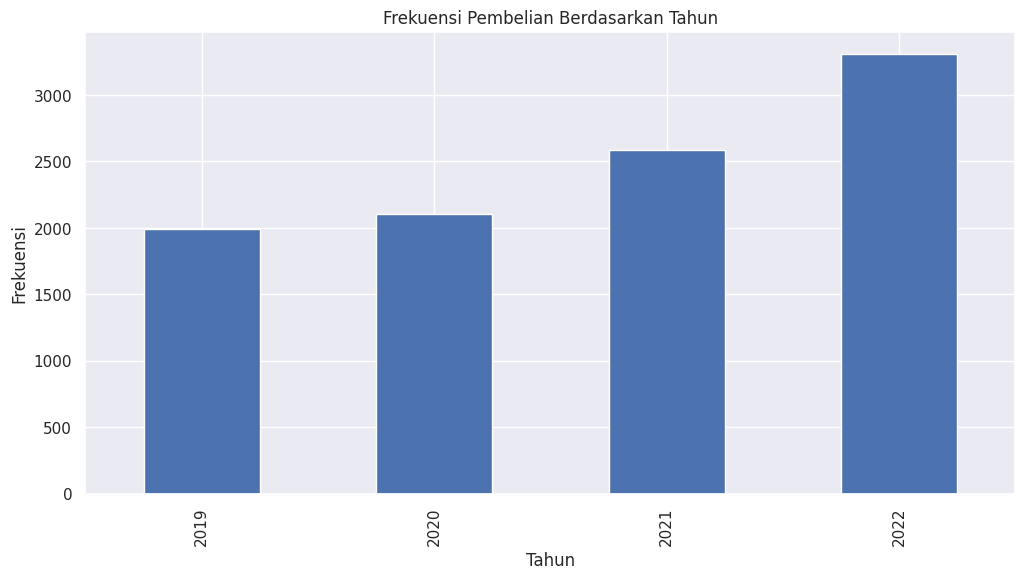

In [ ]:
plt.figure(figsize=(12,6))
data['order_date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Frekuensi Pembelian Berdasarkan Tahun')
plt.ylabel('Frekuensi')
plt.xlabel('Tahun')
plt.show()

Jika plot transaksi dipartisi berdasarkan tahun, maka terlihat dari tahun 2019 hingga 2023, jumlah total transaksi pembelian selalu mengalami tren kenaikan secara berkala

# **Market Basket Analysis** (Association rule using Apriori Algorithm)

## General Analysis

In [ ]:
formatted_data

,Member_name,Date,itemDescription,day,month,year,season
0,Darren Powers,2019-01-03,Paper,3,1,2019,winter
1,Phillina Ober,2019-01-04,Binders,4,1,2019,winter
2,Phillina Ober,2019-01-04,Labels,4,1,2019,winter
3,Phillina Ober,2019-01-04,Storage,4,1,2019,winter
4,Mick Brown,2019-01-05,Art,5,1,2019,winter
...,...,...,...,...,...,...,...
9989,Chuck Clark,2022-12-30,Appliances,30,12,2022,winter
9990,Patrick O'Donnell,2022-12-30,Bookcases,30,12,2022,winter
9991,Patrick O'Donnell,2022-12-30,Binders,30,12,2022,winter
9992,Patrick O'Donnell,2022-12-30,Phones,30,12,2022,winter


In [ ]:
# Mengubah format data agar sesuai untuk analisis - membuat tabel one-hot encoding
basket = formatted_data.groupby(['Member_name', 'itemDescription'])['itemDescription'].count().unstack().reset_index().fillna(0)

# Mengubah nilai menjadi 1 atau 0 (1 jika dibeli, 0 jika tidak)
basket = basket.set_index('Member_name')
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

basket.head(10)

itemDescription,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Member_name,,,,,,,,,,,,,,,,,
Aaron Bergman,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0
Aaron Hawkins,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,0
Aaron Smayling,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1
Adam Bellavance,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1
Adam Hart,1,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1,1
Adam Shillingsburg,1,1,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1
Adrian Barton,1,0,1,1,0,0,0,0,0,1,1,1,0,1,1,0,1
Adrian Hane,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1
Adrian Shami,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


Tabel one-hot encoded di atas menggambarkan perilaku belanja setiap pelanggan (diwakili oleh Member_name) terhadap berbagai kategori produk (itemDescription). Contoh:
1. Aaron Bergman:
   - Membeli produk dari kategori berikut: Art, Bookcases, Chairs, Phones, dan Storage (ditunjukkan oleh angka 1 pada kolom-kolom tersebut).
   - Tidak membeli produk dari kategori seperti Accessories, Appliances, atau Binders (ditunjukkan oleh angka 0 pada kolom-kolom tersebut).
2. Aaron Hawkins:
   - Membeli produk dari banyak kategori: Accessories, Art, Binders, Chairs, Envelopes, Furnishings, Labels, Paper, Phones, dan Storage.
   - Tidak membeli produk dari kategori seperti Appliances, Fasteners, atau Copiers.

In [ ]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
3,0.819672,(Binders)
12,0.770492,(Paper)
9,0.665826,(Furnishings)
70,0.650694,"(Binders, Paper)"
14,0.648172,(Storage)
...,...,...
14185,0.010088,"(Storage, Furnishings, Art, Copiers, Appliance..."
14186,0.010088,"(Storage, Phones, Furnishings, Art, Copiers, A..."
14187,0.010088,"(Storage, Phones, Art, Copiers, Appliances, Bi..."
14193,0.010088,"(Art, Appliances, Binders, Envelopes, Machines..."


**Keypoint dari output di atas**<br>
1. **Support**: Kolom ini mewakili frekuensi itemset yang terjadi dalam transaksi. Contoh:
   - Itemset {'Binders'} memiliki support sebesar 0.819672, yang artinya sekitar 81.967% transaksi terdiri dari "Binders".
   - Sama hal nya dengan {'Paper'} muncul di 77.04% transaksi, dan {'Furnishings'} muncul di 66.58% transaksi.
2. **Itemsets**: Ini adalah kombinasi item yang sering muncul bersamaan dalam transaksi. Contoh
   - {'Binders'} paling sering muncul pada transaksi tunggal.
   - Kombinasi dari {'Paper', 'Binders'} sering muncul pada 65.06% transaksi.





In [ ]:
# Menghitung rules asosiasi keseluruhan
rules = association_rules(frequent_itemsets, metric="lift")

# Melihat hasil
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Binders),(Paper),0.819672,0.770492,0.650694,0.793846,1.030311,0.019143,1.113286,0.163143
1,(Paper),(Binders),0.770492,0.819672,0.650694,0.844517,1.030311,0.019143,1.159793,0.128184
2,(Furnishings),(Binders),0.665826,0.819672,0.553594,0.831439,1.014356,0.007835,1.069810,0.042352
3,(Binders),(Furnishings),0.819672,0.665826,0.553594,0.675385,1.014356,0.007835,1.029446,0.078484
4,(Storage),(Binders),0.648172,0.819672,0.546028,0.842412,1.027743,0.014740,1.144303,0.076726
5,(Binders),(Storage),0.819672,0.648172,0.546028,0.666154,1.027743,0.014740,1.053864,0.149696
6,(Storage),(Paper),0.648172,0.770492,0.535939,0.826848,1.073143,0.036529,1.325474,0.193725
7,(Paper),(Storage),0.770492,0.648172,0.535939,0.695581,1.073143,0.036529,1.155738,0.296975
8,(Furnishings),(Paper),0.665826,0.770492,0.535939,0.804924,1.044689,0.022926,1.176508,0.128009
9,(Paper),(Furnishings),0.770492,0.665826,0.535939,0.695581,1.044689,0.022926,1.097744,0.186387


Dari hasil tabel di atas:

1. **Antecedents**: Item atau kumpulan item di sisi kiri aturan. Ini adalah barang-barang yang bila dibeli, dapat mengarah pada pembelian barang-barang di kolom consequents.

  - Misalnya, "Paper" adalah bagian Antecedents atau "jika" dari aturan tersebut.

2. **Consequents**: Item atau kumpulan item di sisi kanan aturan. Ini adalah barang-barang yang kemungkinan besar akan dibeli ketika barang-barang di pendahulunya dibeli.

  - Misalnya, "Binders" adalah konsekuensi atau bagian "kemudian" dari aturan tersebut.

3. **Antecedent support**: Proporsi transaksi yang mengandung item antecedent.

  - Misalnya support untuk (Paper) adalah 0.770492, artinya 77.04% transaksi mengandung "Paper".

4. **Consequents support**: Proporsi transaksi yang mengandung item consequent.

  - Misalnya support untuk (Binders) adalah 0.819672, artinya 81.97% transaksi mengandung "Binders".

5. **Support**: Proporsi transaksi yang mengandung anteseden dan konsekuen. Ini adalah peluang gabungan kedua barang dibeli bersamaan.

  - Misalnya, aturan (Paper) -> (Binder) memiliki dukungan 0,650694, artinya 65,07% transaksi berisi "Paper" dan "Binder".

6. **Confidence**: Kemungkinan konsekuen dibeli ketika anteseden dibeli.

  - Misalnya, confidence sebesar 0,844517 untuk aturan (Paper) -> (Binder) berarti bahwa 84,45% saat "Paper" dibeli, "Binder" juga dibeli.
<br>

$$ Confidence=
\frac{\text{Support of Antecedent and Consequent}}
{\text{Support of Antecedent}}
$$
<br>

7. **Lift**: Kekuatan aturan dibandingkan dengan kejadian bersamaan secara acak dari antecedent dan consequent, dapat dihitung sebagai berikut:

  - Nilai lift >1 menunjukkan hubungan positif (pembelian antecedent membuat pembelian consequent lebih mungkin terjadi).
  - Misalnya, aturan (Paper) -> (Binder) memiliki lift sebesar 1,030311, artinya membeli "Paper" meningkatkan kemungkinan juga membeli "Binder" sebesar 3,03%.
<br>

$$ Lift=
\frac{\text{Confidence}}
{\text{Consequent Support}}
$$
<br>

8. **Leverage**: Mengukur perbedaan antara frekuensi aturan yang diamati dan apa yang diharapkan jika anteseden dan konsekuennya independen. Nilai leverage yang positif berarti aturan tersebut lebih baik daripada kebetulan.

  - Misalnya, leverage sebesar 0,019143 untuk aturan (Paper) -> (Binder) berarti kedua item tersebut muncul bersamaan 1,91% lebih sering dibandingkan jika keduanya independen.

9. **Conviction**: Mengukur tingkat implikasi aturan, dengan nilai yang lebih tinggi menunjukkan implikasi yang lebih kuat.

  - Misalnya, conviction sebesar 1,159793 untuk (Paper) -> (Binder) menunjukkan hubungan yang relatif kuat.
<br>

$$ Conviction=
\frac{\text{1 - Consequent Support}}
{\text{1 - Confidence}}
$$
<br>

10. **zhangs_metric**: Metrik lain yang mengukur kekuatan asosiasi, khususnya berguna ketika terdapat ketidakseimbangan yang tinggi dalam dukungan antara anteseden dan konsekuen.



**Key Insights**:

 - Aturan Kuat: Aturan dengan confidence tinggi dan nilai lift lebih kuat. Misalnya:
    - Aturan (Paper) -> (Binders) memiliki confidence sebesar 0,844517 dan lift sebesar 1,030311, yang menunjukkan bahwa pelanggan yang membeli "Paper" memiliki kemungkinan 3% lebih besar untuk juga membeli "Binders".
    - Aturan (Storage) -> (Binders) memiliki confidence 0,842412 dan lift 1,027743, menunjukkan hubungan serupa antara "Storage" dan "Binders".
 - Aturan yang Lebih Lemah: Confidence atau lift yang lebih rendah mungkin mengindikasikan hubungan yang lebih lemah atau kejadian bersama yang lebih umum yang tidak menunjukkan adanya hubungan yang kuat.

  





In [ ]:
# Mengurutkan berdasarkan confidence
rules = rules.sort_values(by='confidence', ascending=False)

# Menampilkan beberapa rules teratas
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
1818079,"(Storage, Chairs, Art, Bookcases, Machines, Pa...",(Phones),0.010088,1.0,1.551859
433750,"(Storage, Machines, Fasteners, Accessories, Pa...",(Binders),0.022699,1.0,1.220000
1321394,"(Storage, Phones, Chairs, Tables, Art, Machine...",(Binders),0.012610,1.0,1.220000
433746,"(Storage, Binders, Machines, Fasteners, Access...",(Paper),0.022699,1.0,1.297872
771586,"(Storage, Furnishings, Chairs, Appliances, Bin...",(Paper),0.016393,1.0,1.297872
1052227,"(Furnishings, Chairs, Art, Appliances, Binders...","(Phones, Paper)",0.013871,1.0,1.920097
275952,"(Art, Bookcases, Fasteners, Accessories, Paper)",(Binders),0.029004,1.0,1.220000
1321398,"(Storage, Chairs, Tables, Art, Binders, Machin...",(Phones),0.012610,1.0,1.551859
1321401,"(Storage, Phones, Chairs, Tables, Art, Machines)","(Binders, Paper)",0.012610,1.0,1.536822
433716,"(Phones, Machines, Chairs, Envelopes)",(Paper),0.022699,1.0,1.297872


In [ ]:
# Mengurutkan berdasarkan lift
rules = rules.sort_values(by='lift', ascending=False)

# Menampilkan beberapa rules teratas
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
1694366,"(Art, Machines, Appliances, Paper)","(Phones, Chairs, Binders, Envelopes, Fasteners)",0.010088,0.235294,8.885154
1694167,"(Phones, Chairs, Binders, Envelopes, Fasteners)","(Art, Machines, Appliances, Paper)",0.010088,0.380952,8.885154
1694174,"(Phones, Chairs, Envelopes, Fasteners, Paper)","(Art, Machines, Appliances, Binders)",0.010088,0.421053,8.786704
1694359,"(Art, Machines, Appliances, Binders)","(Phones, Chairs, Envelopes, Fasteners, Paper)",0.010088,0.210526,8.786704
1694250,"(Art, Appliances, Binders, Machines, Paper)","(Phones, Fasteners, Chairs, Envelopes)",0.010088,0.242424,8.738292
1694283,"(Phones, Fasteners, Chairs, Envelopes)","(Art, Appliances, Binders, Machines, Paper)",0.010088,0.363636,8.738292
1614910,"(Phones, Fasteners, Chairs, Envelopes)","(Art, Machines, Appliances, Paper)",0.010088,0.363636,8.481283
1614959,"(Art, Machines, Appliances, Paper)","(Phones, Fasteners, Chairs, Envelopes)",0.010088,0.235294,8.481283
1694257,"(Art, Binders, Envelopes, Machines, Paper)","(Fasteners, Phones, Appliances, Chairs)",0.010088,0.444444,8.391534
1694276,"(Fasteners, Phones, Appliances, Chairs)","(Art, Binders, Envelopes, Machines, Paper)",0.010088,0.190476,8.391534


**Insight**:
<br>
Saat diurutkan berdasarkan confidence,

  - Aturan dengan confidence tinggi (seperti 1.0 dalam kasus ini) berarti setiap kali antecedent dibeli, consequent juga selalu dibeli dalam transaksi yang diamati.
  - Nilai lift lebih besar dari 1 (misalnya, 1.551859) menunjukkan hubungan positif yang kuat antara antecedent dan consequent, artinya pembelian antecedent membuat pembelian consequent lebih mungkin dibandingkan jika secara kebetulan.
<br>

Saat diurutkan berdasarkan lift,
  - Lift tinggi (seperti 8.88) menunjukkan hubungan yang sangat kuat antara antecedents dan consequents, artinya pembelian item di kolom antecedents sangat mungkin diikuti oleh pembelian item di kolom consequents.
  - Confidence yang lebih rendah, seperti 0.235294, menunjukkan bahwa meskipun lift tinggi, tidak semua pelanggan yang membeli antecedents juga membeli consequents. Hal ini berarti bahwa hubungan antar item tetap kuat, tetapi hanya untuk sebagian kecil dari transaksi.

## Season-Based Analysis

Untuk mempermudah membuat strategi penjualan, data akan dilihat berdasarkan empat musim.

### Spring

In [ ]:
# Helper Function untuk mempermudah analisis
def apriori_mba(formatted_data, min_support=0.01, use_colnames=True):
  # Mengubah format data agar sesuai untuk analisis - membuat tabel one-hot encoding
  basket = formatted_data.groupby(['Member_name', 'itemDescription'])['itemDescription'].count().unstack().reset_index().fillna(0)

  # Mengubah nilai menjadi 1 atau 0 (1 jika dibeli, 0 jika tidak)
  basket = basket.set_index('Member_name')
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)

  return apriori(basket, min_support=min_support, use_colnames=use_colnames)

In [ ]:
basket

itemDescription,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Member_name,,,,,,,,,,,,,,,,,
Aaron Bergman,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0
Aaron Hawkins,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,0
Aaron Smayling,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1
Adam Bellavance,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1
Adam Hart,1,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xylona Preis,1,1,1,1,0,0,0,1,1,1,0,0,1,0,1,0,0
Yana Sorensen,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1
Yoseph Carroll,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,0


In [ ]:
frequent_itemsets_spring = apriori_mba(formatted_data[formatted_data['season'] == 'winter'], min_support=0.001, use_colnames=True)
frequent_itemsets_spring.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets_spring.head()

,support,itemsets
3,0.379371,(Binders)
12,0.360140,(Paper)
9,0.311189,(Furnishings)
13,0.267483,(Phones)
14,0.256993,(Storage)


In [ ]:
# Menghitung rules asosiasi
rules_spring = association_rules(frequent_itemsets_spring, metric="confidence", min_threshold=0.5)

# Melihat hasil
rules_spring.sort_values(by='lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
86643,"(Envelopes, Furnishings, Fasteners, Tables)","(Storage, Copiers, Appliances, Binders, Suppli...",0.001748,0.001748,0.001748,1.0,572.0,0.001745,inf,1.0
73675,"(Copiers, Binders, Envelopes)","(Storage, Furnishings, Tables, Appliances, Sup...",0.001748,0.001748,0.001748,1.0,572.0,0.001745,inf,1.0
73666,"(Supplies, Copiers, Tables)","(Storage, Furnishings, Appliances, Binders, En...",0.001748,0.001748,0.001748,1.0,572.0,0.001745,inf,1.0
73667,"(Copiers, Fasteners, Tables)","(Storage, Furnishings, Appliances, Binders, En...",0.001748,0.001748,0.001748,1.0,572.0,0.001745,inf,1.0
73668,"(Envelopes, Supplies, Tables)","(Storage, Furnishings, Copiers, Appliances, Bi...",0.001748,0.001748,0.001748,1.0,572.0,0.001745,inf,1.0


In [ ]:
rules_spring.sort_values(by='support', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Storage, Binders)",(Paper),0.111888,0.360140,0.061189,0.546875,1.518507,0.020893,1.412105,0.384477
1,"(Storage, Paper)",(Binders),0.117133,0.379371,0.061189,0.522388,1.376986,0.016752,1.299443,0.310099
2,"(Accessories, Binders)",(Paper),0.113636,0.360140,0.061189,0.538462,1.495146,0.020264,1.386364,0.373626
3,"(Accessories, Paper)",(Binders),0.106643,0.379371,0.061189,0.573770,1.512427,0.020731,1.456092,0.379256
4,(Tables),(Binders),0.110140,0.379371,0.059441,0.539683,1.422573,0.017657,1.348264,0.333815


### Summer

In [ ]:
frequent_itemsets_summer = apriori_mba(formatted_data[formatted_data['season'] == 'summer'], min_support=0.001, use_colnames=True)
frequent_itemsets_summer.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets_summer

,support,itemsets
3,0.423408,(Binders)
12,0.406196,(Paper)
13,0.277108,(Phones)
9,0.265060,(Furnishings)
14,0.259897,(Storage)
...,...,...
4222,0.001721,"(Phones, Appliances, Binders, Envelopes, Faste..."
4219,0.001721,"(Storage, Copiers, Appliances, Binders, Suppli..."
4218,0.001721,"(Phones, Copiers, Appliances, Binders, Supplie..."
4217,0.001721,"(Storage, Phones, Copiers, Appliances, Binders..."


In [ ]:
# Menghitung rules asosiasi untuk musim panas
rules_summer = association_rules(frequent_itemsets_summer, metric="confidence", min_threshold=0.5)

# Melihat hasil
rules_summer.sort_values(by='lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
171535,"(Storage, Phones, Appliances, Bookcases, Paper)","(Furnishings, Copiers, Binders, Supplies)",0.001721,0.001721,0.001721,1.0,581.0,0.001718,inf,1.0
186288,"(Labels, Copiers, Accessories, Paper)","(Storage, Furnishings, Chairs, Appliances, Bin...",0.001721,0.001721,0.001721,1.0,581.0,0.001718,inf,1.0
186301,"(Bookcases, Copiers, Binders, Paper)","(Storage, Furnishings, Chairs, Labels, Applian...",0.001721,0.001721,0.001721,1.0,581.0,0.001718,inf,1.0
186299,"(Copiers, Appliances, Accessories, Paper)","(Storage, Furnishings, Chairs, Labels, Binders...",0.001721,0.001721,0.001721,1.0,581.0,0.001718,inf,1.0
186298,"(Bookcases, Copiers, Appliances, Paper)","(Storage, Furnishings, Chairs, Labels, Binders...",0.001721,0.001721,0.001721,1.0,581.0,0.001718,inf,1.0


In [ ]:
rules_summer.sort_values(by='support', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Chairs),(Paper),0.177281,0.406196,0.101549,0.572816,1.410194,0.029538,1.390041,0.353556
2,(Appliances),(Binders),0.153184,0.423408,0.096386,0.629213,1.486069,0.031526,1.555051,0.386251
1,(Chairs),(Binders),0.177281,0.423408,0.096386,0.543689,1.284079,0.021324,1.263595,0.268903
3,(Appliances),(Paper),0.153184,0.406196,0.086059,0.561798,1.383070,0.023836,1.355091,0.327073
4,"(Furnishings, Binders)",(Paper),0.130809,0.406196,0.068847,0.526316,1.295718,0.015713,1.253586,0.262574


###Autumn

In [ ]:
frequent_itemsets_autumn = apriori_mba(formatted_data[formatted_data['season'] == 'autumn'], min_support=0.001, use_colnames=True)
frequent_itemsets_autumn.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets_autumn.head()

,support,itemsets
3,0.504155,(Binders)
12,0.463989,(Paper)
9,0.373961,(Furnishings)
14,0.350416,(Storage)
13,0.339335,(Phones)


In [ ]:
# Menghitung rules asosiasi untuk musim gugur
rules_autumn = association_rules(frequent_itemsets_autumn, metric="confidence", min_threshold=0.5)

# Melihat hasil
rules_autumn.sort_values(by='lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
227934,"(Bookcases, Machines, Accessories)","(Storage, Furnishings, Chairs, Tables, Art, En...",0.001385,0.001385,0.001385,1.0,722.0,0.001383,inf,1.0
133980,"(Furnishings, Envelopes, Bookcases, Fasteners,...","(Storage, Chairs, Tables, Art, Machines)",0.001385,0.001385,0.001385,1.0,722.0,0.001383,inf,1.0
133976,"(Furnishings, Art, Bookcases, Fasteners, Acces...","(Storage, Chairs, Tables, Envelopes, Machines)",0.001385,0.001385,0.001385,1.0,722.0,0.001383,inf,1.0
133975,"(Furnishings, Art, Bookcases, Machines, Access...","(Storage, Chairs, Tables, Envelopes, Fasteners)",0.001385,0.001385,0.001385,1.0,722.0,0.001383,inf,1.0
133973,"(Furnishings, Art, Envelopes, Machines, Access...","(Storage, Chairs, Tables, Bookcases, Fasteners)",0.001385,0.001385,0.001385,1.0,722.0,0.001383,inf,1.0


In [ ]:
rules_autumn.sort_values(by='support', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Binders),(Paper),0.504155,0.463989,0.261773,0.519231,1.119059,0.027850,1.114903,0.214567
1,(Paper),(Binders),0.463989,0.504155,0.261773,0.564179,1.119059,0.027850,1.137726,0.198488
2,(Furnishings),(Paper),0.373961,0.463989,0.206371,0.551852,1.189364,0.032857,1.196058,0.254321
3,(Furnishings),(Binders),0.373961,0.504155,0.199446,0.533333,1.057875,0.010912,1.062525,0.087389
4,(Storage),(Binders),0.350416,0.504155,0.198061,0.565217,1.121118,0.021397,1.140443,0.166311


### Winter

In [ ]:
frequent_itemsets_winter = apriori_mba(formatted_data[formatted_data['season'] == 'winter'], min_support=0.001, use_colnames=True)
frequent_itemsets_winter.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets_winter.head()

,support,itemsets
3,0.379371,(Binders)
12,0.360140,(Paper)
9,0.311189,(Furnishings)
13,0.267483,(Phones)
14,0.256993,(Storage)


In [ ]:
# Menghitung rules asosiasi untuk musim dingin
rules_winter = association_rules(frequent_itemsets_winter, metric="confidence", min_threshold=0.5)

# Melihat hasil
rules_winter.sort_values(by='lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
86643,"(Envelopes, Furnishings, Fasteners, Tables)","(Storage, Copiers, Appliances, Binders, Suppli...",0.001748,0.001748,0.001748,1.0,572.0,0.001745,inf,1.0
73675,"(Copiers, Binders, Envelopes)","(Storage, Furnishings, Tables, Appliances, Sup...",0.001748,0.001748,0.001748,1.0,572.0,0.001745,inf,1.0
73666,"(Supplies, Copiers, Tables)","(Storage, Furnishings, Appliances, Binders, En...",0.001748,0.001748,0.001748,1.0,572.0,0.001745,inf,1.0
73667,"(Copiers, Fasteners, Tables)","(Storage, Furnishings, Appliances, Binders, En...",0.001748,0.001748,0.001748,1.0,572.0,0.001745,inf,1.0
73668,"(Envelopes, Supplies, Tables)","(Storage, Furnishings, Copiers, Appliances, Bi...",0.001748,0.001748,0.001748,1.0,572.0,0.001745,inf,1.0


In [ ]:
rules_winter.sort_values(by='support', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Storage, Binders)",(Paper),0.111888,0.360140,0.061189,0.546875,1.518507,0.020893,1.412105,0.384477
1,"(Storage, Paper)",(Binders),0.117133,0.379371,0.061189,0.522388,1.376986,0.016752,1.299443,0.310099
2,"(Accessories, Binders)",(Paper),0.113636,0.360140,0.061189,0.538462,1.495146,0.020264,1.386364,0.373626
3,"(Accessories, Paper)",(Binders),0.106643,0.379371,0.061189,0.573770,1.512427,0.020731,1.456092,0.379256
4,(Tables),(Binders),0.110140,0.379371,0.059441,0.539683,1.422573,0.017657,1.348264,0.333815


### Key Insights and Strategic Recommendations

Berikut insights yang bisa diperoleh dari analisis data berdasarkan musim di atas.
<br>
1. **Spring**:
  - Antecedents seperti (Paper, Storage) atau (Binders, Storage) menunjukkan kombinasi produk yang sering dibeli bersama di musim semi.
  - Support tertinggi sebesar 0.061189 menunjukkan bahwa sekitar 6.1% dari transaksi mencakup kombinasi antecedents dan consequents tersebut, dengan confidence sekitar 52-57%.
  - Lift menunjukkan nilai yang cukup baik antara 1.37 hingga 1.51, yang berarti pembelian antecedent meningkatkan kemungkinan pembelian consequent sebesar 37% hingga 51%.

  Kesimpulan: Kombinasi produk seperti Paper dan Storage cenderung dikaitkan dengan pembelian Binders, dan Accessories dan Paper memiliki asosiasi kuat dengan Binders. Strategi cross-selling atau penempatan barang di musim semi bisa mempertimbangkan asosiasi ini.

2. **Summer**:
  - (Chairs -> Paper) dan (Appliances -> Binders) adalah aturan dengan support tertinggi pada musim panas, dengan support mencapai 10.15% untuk aturan Chairs -> Paper.
  - Confidence cukup tinggi, mencapai hingga 62.92% untuk aturan Appliances -> Binders.
  - Lift berkisar antara 1.28 hingga 1.48, menunjukkan peningkatan yang signifikan dalam kemungkinan pembelian consequent ketika antecedent dibeli.

  Kesimpulan: Musim panas menunjukkan korelasi kuat antara Chairs dan Paper, serta Appliances dengan Binders, yang bisa dipertimbangkan untuk strategi penjualan musiman.

3. **Autumn**:
  - Paper -> Binders memiliki support tertinggi, sekitar 26.17%, yang berarti aturan ini sangat umum terjadi di musim gugur.
  - Confidence mencapai 56.42% untuk aturan Paper -> Binders dan 56.52% untuk aturan Storage -> Binders walaupun memiliki support yang lebih rendah dibanding Paper -> Binders.
  - Lift lebih rendah dibandingkan musim lain, dengan rentang 1.05 hingga 1.18, menunjukkan asosiasi yang lemah namun tetap signifikan.

  Kesimpulan: Musim gugur menunjukkan aturan kuat untuk kategori produk inti seperti Paper dan Binders, yang sering dibeli bersama, menunjukkan potensi untuk promosi terkait produk.

4. **Winter**:
  - Paper, Storage -> Binders dan Binders, Storage -> Paper menunjukkan aturan dominan di musim dingin dengan support tertinggi sekitar 6.1%.
  - Confidence berkisar antara 52.2% hingga 57.37%, yang berarti lebih dari separuh waktu pembelian antecedents diikuti oleh consequents.
  - Lift bervariasi dari 1.37 hingga 1.51, yang menunjukkan hubungan yang signifikan.

  Kesimpulan: Musim dingin menunjukkan preferensi pelanggan terhadap produk seperti Binders dan Storage, serta kombinasi Accessories dan Paper. Ini bisa menjadi indikasi produk yang saling melengkapi untuk promosi bundling atau penempatan produk.


**Rekomendasi Strategis**:
  - Kombinasi Produk: Di setiap musim, aturan yang kuat muncul untuk kategori produk inti seperti Paper, Binders, Accessories, dan Storage. Produk-produk ini sering kali muncul bersama, dan ini bisa dimanfaatkan untuk kampanye promosi yang sesuai dengan musim.
  - Lift dan Confidence di setiap musim menunjukkan variasi kecil, yang bisa dimanfaatkan untuk mengoptimalkan penawaran di setiap musim sesuai dengan tren pembelian pelanggan.



